<a href="https://colab.research.google.com/github/sathwikneela/AV-LTFS-Data-Science-FinHack-2/blob/master/LTFS_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [ ]:
train = pd.read_csv('/content/drive/My Drive/LTFS/train_fwYjLYX.csv')
test = pd.read_csv('/content/drive/My Drive/LTFS/test_1eLl9Yf.csv')

In [ ]:
train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [ ]:
test.head()

,id,application_date,segment
0,1,2019-07-06,1
1,2,2019-07-07,1
2,3,2019-07-08,1
3,4,2019-07-09,1
4,5,2019-07-10,1


In [ ]:
train['application_date']=pd.to_datetime(train['application_date'],format='%Y-%m-%d')
test['application_date']=pd.to_datetime(test['application_date'],format='%Y-%m-%d')


In [ ]:
Submission = test[['id','application_date','segment']]
test.drop('id')

In [ ]:
df_train = train.copy()
df_test = test.copy()

In [ ]:
train_s1 = train(train['segment']==1).groupby(train['application_date']).sum().reset_index()[['application_date','case_count']].sort_values('application_date')
train_s2 = train(train['segment']==2).groupby(train['application_date']).sum()

TypeError: ignored

**EDA - Train Data**

In [ ]:
print ("Shape of train is:{}".format(train.shape))
print("Shape of test is:{}".format(test.shape))

Shape of train is:(80402, 6)
Shape of test is:(180, 3)


In [ ]:
train['branch_id'].value_counts().head(10)

159.0    806
29.0     806
67.0     806
269.0    806
74.0     806
268.0    806
135.0    806
62.0     806
271.0    806
17.0     806
Name: branch_id, dtype: int64

In [ ]:
train['branch_id'].isnull().sum()

13504

In [ ]:
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80402 entries, 0 to 80401
Data columns (total 6 columns):
application_date    80402 non-null datetime64[ns]
segment             80402 non-null int64
branch_id           66898 non-null float64
state               80402 non-null object
zone                66898 non-null object
case_count          80402 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 11.9 MB


In [ ]:
train['application_date'].max(),train['application_date'].min()

(Timestamp('2019-07-23 00:00:00'), Timestamp('2017-04-01 00:00:00'))

Text(0, 0.5, 'Count')

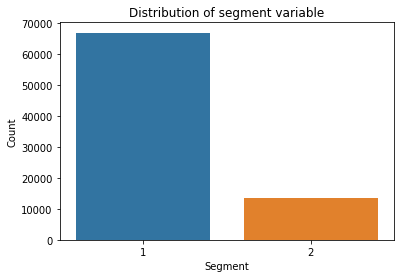

In [ ]:
sns.countplot(train['segment'],order=train['segment'].value_counts().index)
plt.title("Distribution of segment variable")
plt.xlabel("Segment")
plt.ylabel("Count")

In [ ]:
train['branch_id'].value_counts(dropna=False).head(10)

NaN      13504
159.0      806
17.0       806
67.0       806
269.0      806
74.0       806
268.0      806
135.0      806
62.0       806
271.0      806
Name: branch_id, dtype: int64

In [ ]:
print("No of Unique branch_id's in training data are:{}".format(train['branch_id'].nunique()))

No of Unique branch_id's in training data are:83


Text(0, 0.5, 'count')

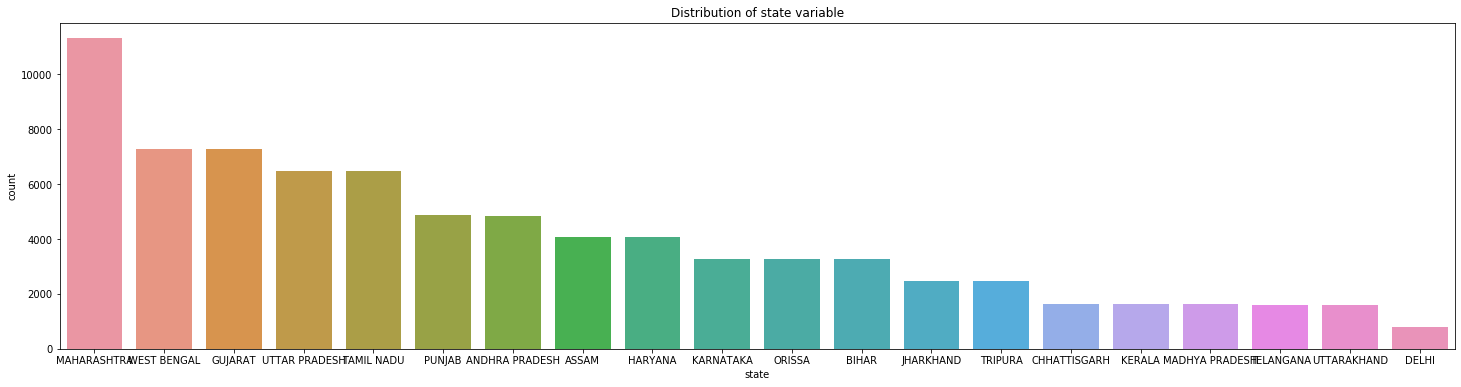

In [ ]:
plt.figure(figsize=(25,6))
sns.countplot(train['state'],order=train['state'].value_counts(dropna = False).index)
plt.title("Distribution of state variable")
plt.xlabel('state')
plt.ylabel("count")

Text(0, 0.5, 'count')

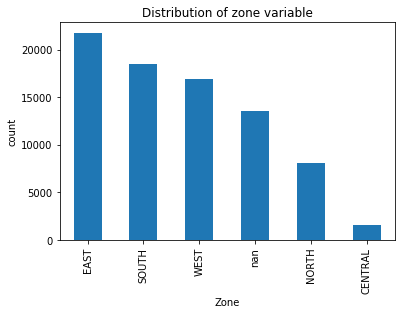

In [ ]:
train['zone'].value_counts(dropna = False).plot(kind='bar')
plt.title("Distribution of zone variable")
plt.xlabel("Zone")
plt.ylabel("count")

In [ ]:
train['case_count'].describe()

count    80402.000000
mean       185.481841
std        749.602925
min          0.000000
25%          0.000000
50%         18.000000
75%         60.000000
max      13787.000000
Name: case_count, dtype: float64

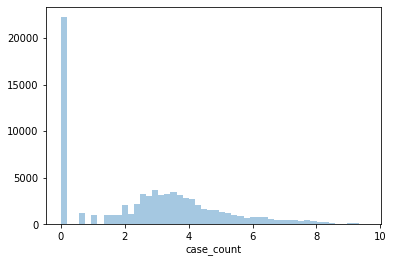

In [ ]:
sns.distplot(np.log1p(train['case_count']),kde= False,bins=50)

**Bi-Variate Analysis**



In [ ]:
train.groupby('segment')['case_count'].agg(['count','min','max','mean','median','std','sum'])
#we can see the max value belongs to segment 2
#all the values for segment 2 are higher than segment 1

,count,min,max,mean,median,std,sum
segment,,,,,,,
1,66898,0.0,1890.0,32.707106,14.0,61.591868,2188040.0
2,13504,0.0,13787.0,942.318646,371.0,1624.339623,12725071.0


In [ ]:
train.groupby('state')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by = 'count')

# We can see that the count of maharashtra is highest, but all the case_counts's are highest for tamilnadu

,count,min,max,mean,median,std,sum
state,,,,,,,
DELHI,806,0.0,1488.0,168.486352,136.0,148.757794,135800.0
UTTARAKHAND,1612,0.0,383.0,24.782258,20.0,27.525605,39949.0
TELANGANA,1612,0.0,1038.0,56.153226,0.0,88.913544,90519.0
KERALA,1650,0.0,3369.0,496.008485,39.5,722.016808,818414.0
CHHATTISGARH,1650,0.0,1111.0,181.298788,22.5,241.012685,299143.0
MADHYA PRADESH,1650,0.0,2350.0,348.672121,87.0,455.859267,575309.0
TRIPURA,2456,0.0,997.0,82.313111,32.0,142.665541,202161.0
JHARKHAND,2456,0.0,833.0,69.036645,20.0,137.794878,169554.0
BIHAR,3262,0.0,7691.0,419.025445,25.0,1111.541528,1366861.0


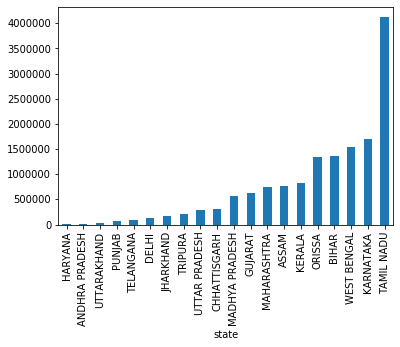

In [ ]:
train.groupby('state')['case_count'].sum().sort_values().plot(kind = 'bar')

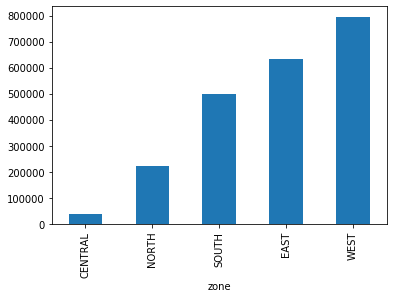

In [ ]:
train.groupby('zone')['case_count'].sum().sort_values().plot(kind = 'bar')

In [ ]:
train.groupby('zone')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by = 'count')
# Even here, although the counts of East zone is highest, we can see the maximum case counts for south is highest

,count,min,max,mean,median,std,sum
zone,,,,,,,
CENTRAL,1612,0.0,609.0,23.082506,11.0,36.657118,37209.0
NORTH,8060,0.0,1488.0,27.383002,6.0,69.671582,220707.0
WEST,16926,0.0,1890.0,46.985053,23.0,77.373460,795269.0
SOUTH,18538,0.0,1143.0,26.973784,8.0,54.089844,500040.0
EAST,21762,0.0,1657.0,29.170802,16.0,48.989433,634815.0


In [ ]:
#creating some datetime based features
train['year'] = train.application_date.dt.year
train['month']=train.application_date.dt.month
train['week']=train.application_date.dt.week
train['day_of_week'] = train.application_date.dt.dayofweek
train['quarter'] = train.application_date.dt.quarter
train['day'] = train.application_date.dt.day
train['is_month_start'] = train.application_date.dt.is_month_start
train['is_month_end'] = train.application_date.dt.is_month_end
train['is_quarter_start'] = train.application_date.dt.is_quarter_start
train['is_quarter_end']=train.application_date.dt.is_quarter_end

In [ ]:
train.head()

,application_date,segment,branch_id,state,zone,case_count,year,month,week,day_of_week,quarter,day,is_month_start,is_month_end,is_quarter_start,is_quarter_end
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0,2017,4,13,5,2,1,True,False,True,False
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0,2017,4,14,0,2,3,False,False,False,False
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0,2017,4,14,1,2,4,False,False,False,False
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0,2017,4,14,2,2,5,False,False,False,False
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0,2017,4,14,4,2,7,False,False,False,False


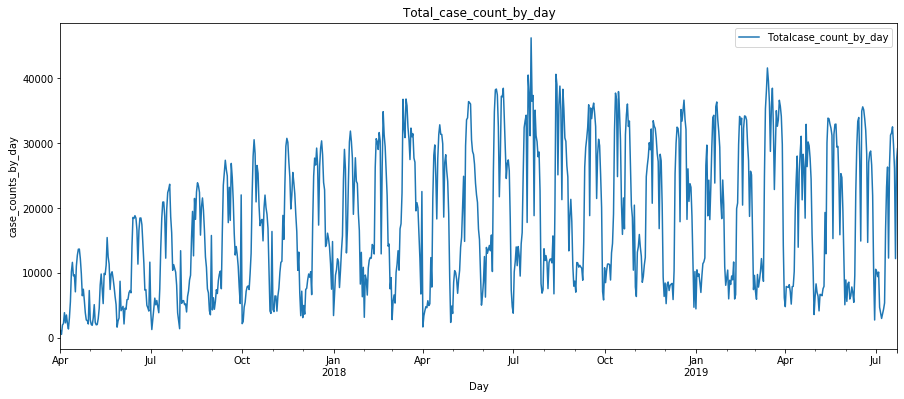

In [ ]:
train.set_index('application_date').resample('D')['case_count'].sum().plot(kind = 'line',figsize = (15,6),label = 'Totalcase_count_by_day')
plt.title('Total_case_count_by_day')
plt.xlabel('Day')
plt.ylabel('case_counts_by_day')
plt.legend(loc = 'best')
# We can see some kind of trend here, the sum total of case counts increases for sometime and then stays almost same. 
# We can also see a spike that is apart from the trend around July-Oct of 2018.

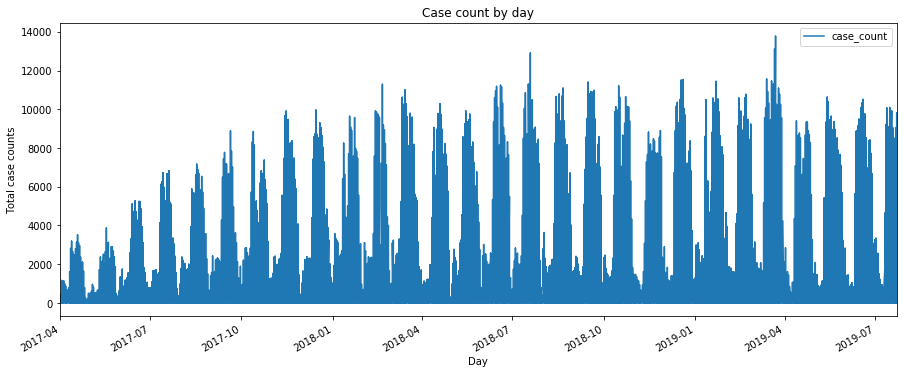

In [ ]:
train.set_index('application_date')['case_count'].plot(kind = 'line',figsize =(15,6))
plt.title('Case count by day')
plt.xlabel('Day')
plt.ylabel('Total case counts')
plt.legend(loc = 'best')
#we can also see the increasing and decreasing trends here

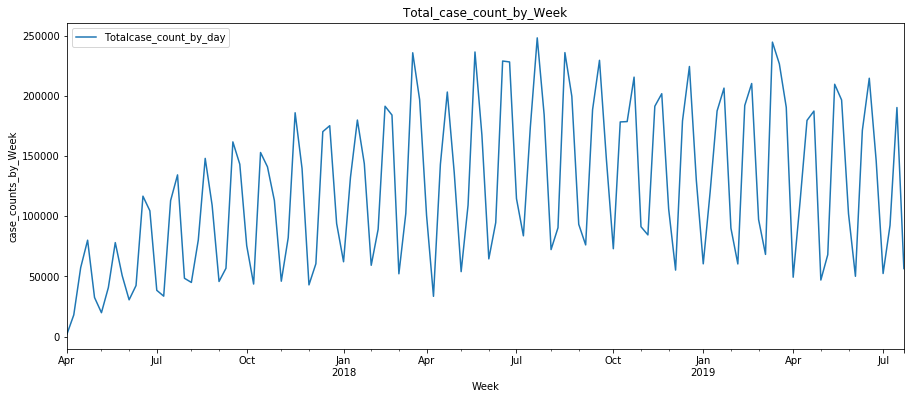

In [ ]:
train.set_index('application_date').resample('W')['case_count'].sum().plot(kind = 'line',figsize = (15,6),label = 'Totalcase_count_by_day')
plt.title('Total_case_count_by_Week')
plt.xlabel('Week')
plt.ylabel('case_counts_by_Week')
plt.legend(loc = 'best')
# We can see increasing and decreasing trends here as well

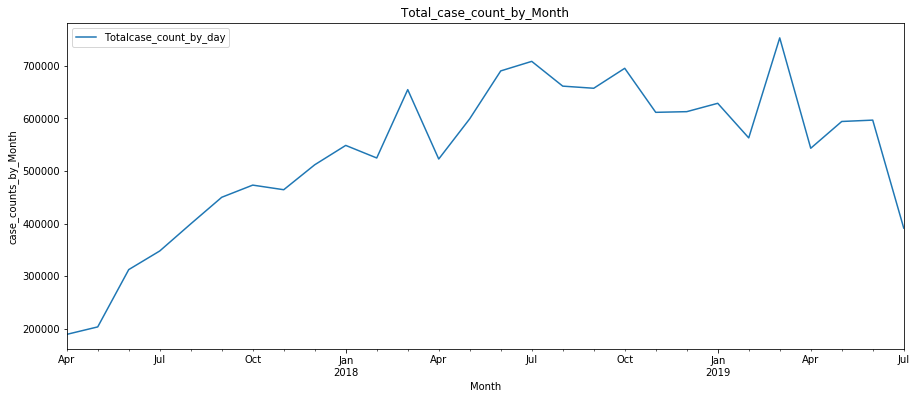

In [ ]:
train.set_index('application_date').resample('M')['case_count'].sum().plot(kind = 'line',figsize = (15,6),label = 'Totalcase_count_by_day')
plt.title('Total_case_count_by_Month')
plt.xlabel('Month')
plt.ylabel('case_counts_by_Month')
plt.legend(loc = 'best')
# We can see a gradual increase for sometime and then series of increasing and decreasing trends followed by a dip at the end

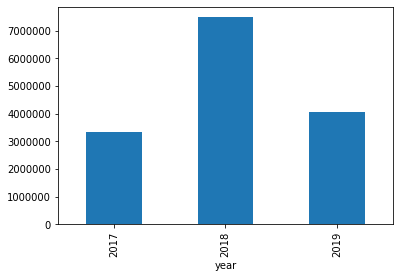

In [ ]:
train.groupby('year')['case_count'].sum().sort_index().plot(kind = 'bar')
# We can see a spike in the total case_counts from 2017-2018

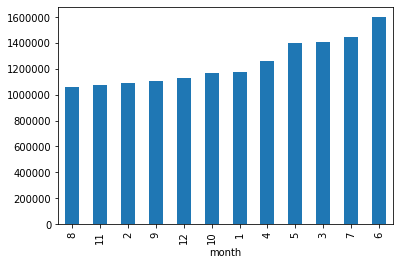

In [ ]:
train.groupby('month')['case_count'].sum().sort_values().plot(kind = 'bar')
# case counts are maximum in the month of june follwed by july, march and may which are close to eachother. 
# There are minimum case counts in the month of august

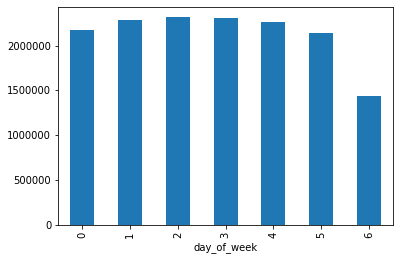

In [ ]:
train.groupby('day_of_week')['case_count'].sum().sort_index().plot(kind='bar')

In [ ]:
train.groupby('day_of_week')['case_count'].agg(['count','min','max','mean','median','std','sum']).sort_values(by='count')
#friday has the highest occurance and sunday has the least
#wednesday has the highest no.of counts

,count,min,max,mean,median,std,sum
day_of_week,,,,,,,
6,11149,0.0,10250.0,128.858821,6.0,524.116220,1436647.0
5,11398,0.0,13787.0,187.348921,15.0,772.206734,2135403.0
2,11548,0.0,11160.0,200.408382,23.0,785.416843,2314316.0
4,11548,0.0,13118.0,195.889938,20.0,790.769909,2262137.0
0,11564,0.0,10805.0,187.947250,23.0,726.091558,2173422.0
1,11564,0.0,11506.0,197.249654,19.0,801.207821,2280995.0
3,11631,0.0,12908.0,198.623592,20.0,798.405221,2310191.0


In [ ]:
train.groupby(['year','quarter'])['case_count'].agg(['count','min','max','mean','median','std','sum'])
#count is maximum in the 4th quarter of 2019 and in the 3rd and 4th quarter of 2018
#sum is maximum during the 3rd and 4th quarter of 2018

count  min      max        mean  median          std        sum
year quarter                                                                 
2017 2         8428  0.0   5274.0   83.795918     4.0   355.182813   706232.0
     3         8361  0.0   8884.0  143.277240     8.0   586.083382  1197941.0
     4         9108  0.0   9963.0  159.180281     8.0   672.335216  1449814.0
2018 1         8578  0.0  11288.0  201.493122    15.0   776.551733  1728408.0
     2         9009  0.0  11241.0  201.202020    17.0   782.798312  1812629.0
     3         9108  0.0  12908.0  222.579381    22.0   832.692992  2027253.0
     4         9108  0.0  11536.0  210.783487    28.0   791.775034  1919816.0
2019 1         8910  0.0  13787.0  218.289675    25.0   899.676700  1944961.0
     2         9009  0.0  10629.0  192.518704    26.0   785.605175  1734401.0
     3          783  0.0  10099.0  500.199234    47.0  1348.030656   391656.0

**Defining the Evaluation Metric**

In [ ]:
def mean_absolute_percentage_error(y_true,y_pred):
  y_true,y_pred = np.array(y_true),np.array(y_pred)
  return np.mean(np.abs((y_pred-y_true)/y_pred))*100

**Model Building**

1.  Since we are supposed to forecast the sum of case counts at country level, it makes sense to create the data frame using current train and test dataframes

2.   We can also create additional features like we did earlier using dataframes




In [ ]:
df_train.head()

,application_date,segment,branch_id,state,zone,case_count
0,2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
1,2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2,2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
3,2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
4,2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [ ]:
df_train.drop(['branch_id','state','zone'],axis=1,inplace=True)

In [ ]:
df_train = df_train.groupby(['application_date','segment'],as_index=False)['case_count'].sum()
df_train.head()

,application_date,segment,case_count
0,2017-04-01,1,299.0
1,2017-04-01,2,897.0
2,2017-04-02,2,605.0
3,2017-04-03,1,42.0
4,2017-04-03,2,2016.0


In [ ]:
holidays = ['2017-04-05','2017-04-09','2017-04-14','2017-05-01',
       '2017-05-10', '2017-06-25', '2017-06-26', '2017-08-07',
       '2017-08-14', '2017-08-15', '2017-08-25', '2017-09-02',
       '2017-09-04', '2017-09-30', '2017-10-01', '2017-10-02',
       '2017-10-19', '2017-12-01', '2017-12-25', '2018-01-01', 
       '2018-01-14', '2018-01-22', '2018-01-26',
       '2018-01-31', '2018-02-10', '2018-02-14', '2018-02-19',
       '2018-03-01', '2018-03-02', '2018-03-18', '2018-03-25',
       '2018-03-29', '2018-03-30', '2018-04-01', '2018-04-14',
       '2018-04-15', '2018-04-30', '2018-05-09', '2018-06-15',
       '2018-06-16', '2018-07-14', '2018-08-15', '2018-08-17',
       '2018-08-22', '2018-08-25', '2018-08-26', '2018-09-03',
       '2018-09-13', '2018-09-21', '2018-10-02', '2018-10-16',
       '2018-10-17', '2018-10-18', '2018-10-19', '2018-10-24',
       '2018-10-27', '2018-11-06', '2018-11-07', '2018-11-08',
       '2018-11-09', '2018-11-13', '2018-11-21', '2018-11-23',
       '2018-11-24', '2018-12-24', '2018-12-25', '2019-01-01',
       '2019-01-13', '2019-01-14', '2019-01-15', '2019-01-26',
       '2019-02-10', '2019-02-19', '2019-03-01', '2019-03-04',
       '2019-03-20', '2019-03-21', '2019-04-06', '2019-04-13',
       '2019-04-14', '2019-04-15', '2019-04-17', '2019-04-19',
       '2019-04-21', '2019-05-09', '2019-05-18', '2019-05-31',
       '2019-06-05', '2019-07-04', '2019-08-12', '2019-08-15',
       '2019-08-17', '2019-08-24', '2019-09-02', '2019-09-10',
       '2019-09-11', '2019-10-02', '2019-10-05', '2019-10-06',
       '2019-10-07', '2019-10-08', '2019-10-13', '2019-10-17',
       '2019-10-27', '2019-10-28', '2019-10-29', '2019-11-02',
       '2019-11-10', '2019-11-12', '2019-11-24', '2019-12-24',
       '2019-12-25']
df_train['Holiday'] = (df_train.application_date.dt.date.astype("str").isin(holidays)).astype(int)
df_test['Holiday'] = (df_test.application_date.dt.date.astype("str").isin(holidays)).astype(int)

In [ ]:
df_train.head(10)

,application_date,segment,case_count,Holiday
0,2017-04-01,1,299.0,0
1,2017-04-01,2,897.0,0
2,2017-04-02,2,605.0,0
3,2017-04-03,1,42.0,0
4,2017-04-03,2,2016.0,0
5,2017-04-04,1,23.0,0
6,2017-04-04,2,2245.0,0
7,2017-04-05,1,1530.0,1
8,2017-04-05,2,2415.0,1
9,2017-04-06,2,2379.0,0


In [ ]:
df_test.head(10)

,id,application_date,segment,Holiday
0,1,2019-07-06,1,0
1,2,2019-07-07,1,0
2,3,2019-07-08,1,0
3,4,2019-07-09,1,0
4,5,2019-07-10,1,0
5,6,2019-07-11,1,0
6,7,2019-07-12,1,0
7,8,2019-07-13,1,0
8,9,2019-07-14,1,0
9,10,2019-07-15,1,0


**Model Building fro segment1**

In [ ]:
df = df_train[df_train['segment']==1]
df.shape

(806, 4)

In [ ]:
#defining a function to create a weekend indicator
def weekend_indicator(x):
  if (x>4 and x<=6):
    return True
  else:
    return False

In [ ]:
#creating additional datetime feature
df['year'] = df.application_date.dt.year
df['month'] = df.application_date.dt.month
df['dayofweek']=df.application_date.dt.dayofweek
df['day']=df.application_date.dt.day
df['quarter']=df.application_date.dt.quarter
df['is_month_start']=df.application_date.dt.is_month_start
df['is_month_end']=df.application_date.dt.is_month_end
df['is_quarter_start']=df.application_date.dt.is_quarter_start
df['is_quarter_end']=df.application_date.dt.is_quarter_end
df['weekend']=df['dayofweek'].apply(weekend_indicator)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
df.head(10)

,application_date,segment,case_count,Holiday,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,weekend
0,2017-04-01,1,299.0,0,2017,4,5,1,2,True,False,True,False,True
3,2017-04-03,1,42.0,0,2017,4,0,3,2,False,False,False,False,False
5,2017-04-04,1,23.0,0,2017,4,1,4,2,False,False,False,False,False
7,2017-04-05,1,1530.0,1,2017,4,2,5,2,False,False,False,False,False
10,2017-04-07,1,1341.0,0,2017,4,4,7,2,False,False,False,False,False
16,2017-04-12,1,1468.0,0,2017,4,2,12,2,False,False,False,False,False
18,2017-04-13,1,1340.0,0,2017,4,3,13,2,False,False,False,False,False
20,2017-04-14,1,1330.0,1,2017,4,4,14,2,False,False,False,False,False
22,2017-04-15,1,981.0,0,2017,4,5,15,2,False,False,False,False,True
24,2017-04-16,1,409.0,0,2017,4,6,16,2,False,False,False,False,True


In [ ]:
cols = ['year','month','dayofweek','day','quarter']
for col in cols:
  df_train[col]=df[col].astype('category')

In [ ]:
y = df['case_count']
X = df[[col for col in df.columns if col not in ['application_date','segment','case_count']]]

In [ ]:
from sklearn.model_selection import train_test_split,KFold,cross_val_score,RandomizedSearchCV,TimeSeriesSplit,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(604, 11)
(202, 11)
(604,)
(202,)


In [ ]:
model = RandomForestRegressor(n_jobs=1,random_state=42,n_estimators=1000,min_samples_leaf=2,max_depth=None)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mape_segment1 = mean_absolute_percentage_error(y_test,y_pred)
print(mape_segment1)

28.764741601249792


In [ ]:
ser = pd.Series(model.feature_importances_,X.columns).sort_values()
ser

is_quarter_start    0.000371
is_month_start      0.004411
is_quarter_end      0.006666
Holiday             0.013695
weekend             0.020430
quarter             0.041536
dayofweek           0.103284
year                0.148397
month               0.177944
is_month_end        0.217071
day                 0.266195
dtype: float64

In [ ]:
df_test.head()

,id,application_date,segment,Holiday,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,weekend
0,1,2019-07-06,1,0,2019,7,5,6,3,False,False,False,False,True
1,2,2019-07-07,1,0,2019,7,6,7,3,False,False,False,False,True
2,3,2019-07-08,1,0,2019,7,0,8,3,False,False,False,False,False
3,4,2019-07-09,1,0,2019,7,1,9,3,False,False,False,False,False
4,5,2019-07-10,1,0,2019,7,2,10,3,False,False,False,False,False


In [ ]:
df_test['year'] = df_test.application_date.dt.year
df_test['month'] = df_test.application_date.dt.month
df_test['dayofweek'] = df_test.application_date.dt.dayofweek
df_test['day'] = df_test.application_date.dt.day
df_test['quarter'] = df_test.application_date.dt.quarter
df_test['is_month_start'] = df_test.application_date.dt.is_month_start
df_test['is_month_end'] = df_test.application_date.dt.is_month_end
df_test['is_quarter_start'] = df_test.application_date.dt.is_quarter_start
df_test['is_quarter_end'] = df_test.application_date.dt.is_quarter_end
df_test['weekend'] = df_test['dayofweek'].apply(weekend_indicator)


In [ ]:
df_test_segment1 = df_test[df_test['segment']==1]


In [ ]:
df_test_segment1.head()

,id,application_date,segment,Holiday,year,month,dayofweek,day,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end,weekend
0,1,2019-07-06,1,0,2019,7,5,6,3,False,False,False,False,True
1,2,2019-07-07,1,0,2019,7,6,7,3,False,False,False,False,True
2,3,2019-07-08,1,0,2019,7,0,8,3,False,False,False,False,False
3,4,2019-07-09,1,0,2019,7,1,9,3,False,False,False,False,False
4,5,2019-07-10,1,0,2019,7,2,10,3,False,False,False,False,False


In [ ]:
df_test_segment1.drop(['application_date','segment','id'],axis = 1,inplace= True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Submission.loc[Submission['segment']==1,'case_count'] = model.predict(df_test_segment1)

**Model Building for segment 2**

In [ ]:
df = df_train[df_train['segment']==2]
df.shape

(844, 9)

In [ ]:
#creating additional datatime features
df['year'] = df.application_date.dt.year
df['month'] = df.application_date.dt.month
df['dayofweek'] = df.application_date.dt.dayofweek
df['day'] = df.application_date.dt.day
df['quarter'] = df.application_date.dt.quarter
df['is_month_start'] = df.application_date.dt.is_month_start
df['is_month_end'] = df.application_date.dt.is_month_end
df['is_quarter_start'] = df.application_date.dt.is_quarter_start
df['is_quarter_end'] = df.application_date.dt.is_quarter_end
df['weekend'] = df['dayofweek'].apply(weekend_indicator)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
cols = ['year','month','dayofweek','day','quarter']
for col in cols:
    df_train[col] = df[col].astype('category')

In [ ]:
y = df['case_count']
X  = df[[col for col in df.columns if col not in ['application_date','segment','case_count']]]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,shuffle = False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(633, 11)
(211, 11)
(633,)
(211,)


In [ ]:
model = model.fit(X_train,y_train)

In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mape_segment2 = mean_absolute_percentage_error(y_test,y_pred)
mape_segment2

32.079699557589656

In [ ]:
ser = pd.Series(model.feature_importances_,X.columns).sort_values()
ser

is_quarter_end      0.000002
is_quarter_start    0.000257
is_month_start      0.000489
is_month_end        0.001466
weekend             0.001581
Holiday             0.005588
quarter             0.021860
dayofweek           0.058379
month               0.081728
year                0.166027
day                 0.662622
dtype: float64

In [ ]:
final_mape = 0.5*mape_segment1 + 0.5*mape_segment2
final_mape

30.422220579419722

In [ ]:
df_test_segment2  =df_test[df_test['segment']==2]

In [ ]:
df_test_segment2.drop(['application_date','segment','id'],axis=1,inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Submission.loc[Submission['segment'] == 2,'case_count'] = model.predict(df_test_segment2)

In [ ]:
Submission['case_count'] = Submission['case_count'].astype(int)

In [ ]:
Submission.to_csv('First_submission.csv',index=None)

In [ ]:
from google.colab import files
files.download("First_submission.csv")